In [1]:
#http://nbviewer.jupyter.org/github/contaconta/PCA_lecture/blob/master/PCA.ipynb
%matplotlib inline

# ランダムデータで試す

In [6]:
import numpy as np
Cov = np.array([[2.9, -2.2], [-2.2, 6.5]])
X = np.random.multivariate_normal([1,2], Cov, size=200)  # 200 sample 多変量正規分布からランダムなサンプルを描画

In [7]:
np.set_printoptions(4, suppress=True) # show only four decimals 表示形式の指定
print(X[:10,:])                        # print the first 10 rows of X (from 0 to 9)

[[ 0.1093  1.4225]
 [ 3.0541 -5.2425]
 [ 1.3217  0.9288]
 [ 2.3079  3.5656]
 [ 1.8897  2.6442]
 [-0.4973  3.5309]
 [-0.8458  4.081 ]
 [-1.4156  3.5671]
 [-0.0501  3.1459]
 [ 1.7014  0.8805]]


(-5.9047332774154029,
 6.0549433843453411,
 -5.9913909130330421,
 10.180657914515095)

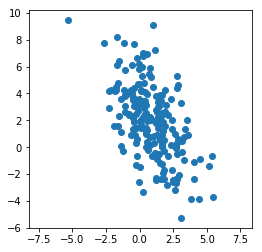

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1])
plt.axis('equal') # equal scaling on both axis;

In [19]:
print(X[:,0])
print(X[:,1])

[ 0.1093  3.0541  1.3217  2.3079  1.8897 -0.4973 -0.8458 -1.4156 -0.0501
  1.7014  1.1903  2.4642 -0.3793  1.3727  0.9149  2.9222  1.5784  0.174
  2.8052  2.0959  1.6688 -0.2837 -1.8888 -0.5211  1.8843  1.7664 -1.4082
  0.0025 -1.7153  4.4755  3.7982  1.9855  1.6196 -2.261  -2.0947  2.7037
 -0.3861  1.3907 -2.2928  1.3217  2.709   1.2889  0.4885  3.0906  1.8262
  0.4815 -0.5273  0.5147  1.1521  1.3073  1.5539 -0.6632 -1.1018  2.4864
  3.5056 -1.1022  0.5481  3.3178  1.6991 -0.3763 -1.387   0.9362 -1.562
  0.3571  1.1689  2.607   0.1335 -0.0579  0.8087  1.2464 -0.6015 -0.4496
  0.8538  1.831   0.1496  1.2261 -1.6139  0.2944 -0.0315  0.741   2.7376
  3.3353 -1.1752  5.3683  0.0268  1.696   0.5179  2.8036  0.7845 -0.04
  1.7882  0.4239 -0.2792  2.4069  0.5273  3.3813  2.1444 -5.3477  0.1282
  1.7254  2.8145 -0.2524 -0.0218 -0.2234 -0.2389  0.2712 -0.1434  1.7055
  0.2401  0.273   1.0333  0.3032  0.4945  2.8058 -1.0983  0.1007  0.7743
  2.0312  0.4895  4.0493 -0.8117  0.4736 -1.7143  1.657

In [20]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)

In [21]:
pca.components_  # これが計算された基底（軸）になります

array([[-0.3876,  0.9218],
       [ 0.9218,  0.3876]])

In [22]:
pca.mean_  #データの平均

array([ 0.8773,  1.9532])

In [23]:
pca.explained_variance_ratio_  # 固有値が占める割合(各軸の重要度)

array([ 0.844,  0.156])

PCAで射影されたデータを見る

X_pcaはPCAによって求めた軸上で見た時のデータに変換されたもの

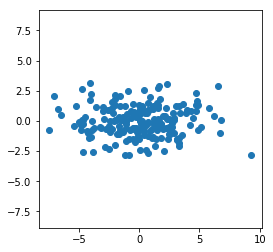

In [24]:
plt.figure(figsize=(4,4))
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.axis('equal');

ちゃんとデータが多い方向に軸がとり直されてる。

元のデータをPCAで求めた軸上にプロットしてみる

元データから平均を引いて，軸上に射影する


In [25]:
Y = np.dot((X - pca.mean_), pca.components_.T)

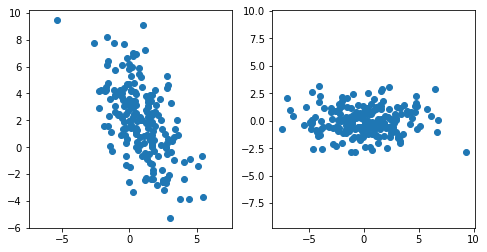

In [26]:
plt.figure(figsize=(8,4))

# 元のデータ
plt.subplot(121)
plt.scatter(X[:,0], X[:,1])
plt.axis('equal');

# 射影されたデータ
plt.subplot(122)
plt.scatter(Y[:,0], Y[:,1])
plt.axis('equal');

# 顔データをPCAしてみる

In [30]:
import matplotlib as mpl
from sklearn.datasets import fetch_olivetti_faces
data = fetch_olivetti_faces()

downloading Olivetti faces from http://cs.nyu.edu/~roweis/data/olivettifaces.mat to /Users/miyamoto/scikit_learn_data


URLError: <urlopen error [Errno 60] Operation timed out>

In [ ]:
plt.subplot(221)
plt.imshow(data.images[0], cmap=mpl.cm.gray)
plt.subplot(222)
plt.imshow(data.images[1], cmap=mpl.cm.gray)
plt.subplot(223)
plt.imshow(data.images[2], cmap=mpl.cm.gray)
plt.subplot(224)
plt.imshow(data.images[3], cmap=mpl.cm.gray)